# Classification for Stunting Dataset
In this section we will classifying the IMT/U Category using 4 Feature Columns

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
df = pd.read_csv("/home/rmfarizky/Project/deteksi_stunting/Dataset/dataset.csv")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   j_kel             624 non-null    int64  
 1   usia_ukur(bulan)  624 non-null    int64  
 2   berat             624 non-null    float64
 3   tinggi            624 non-null    float64
 4   Z_BB/TB           624 non-null    float64
 5   Z_BB/U            624 non-null    float64
 6   Z_TB/U            624 non-null    float64
 7   Z_IMT/U           624 non-null    float64
 8   BB/TB             624 non-null    object 
 9   BB/U              624 non-null    object 
 10  TB/U              624 non-null    object 
 11  IMT/U             624 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 58.6+ KB


# Working on IMT/U
In this classification task, our focus will be on  `IMT/U` category, which contains six labels:

0. Gizi Baik
1. Gizi Buruk
2. Gizi Kurang
3. Gizi Lebih
4. Obesitas
5. Resiko Gizi Lebih

In [81]:
df[df.columns[-1]].unique()

array(['Gizi Baik', 'Gizi Kurang', 'Resiko Gizi Lebih', 'Gizi Buruk',
       'Gizi Lebih', 'Obesitas'], dtype=object)

## Define the DataFrame

In [82]:
df_IMT = df[df.columns[:4].tolist() + [df.columns[-1]]]
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,IMT/U
0,0,58,13.1,97.5,Gizi Baik
1,1,57,12.2,98.5,Gizi Baik
2,1,56,12.6,95.5,Gizi Baik
3,0,55,14.2,99.3,Gizi Baik
4,1,53,13.2,97.0,Gizi Baik
...,...,...,...,...,...
619,1,9,7.0,67.5,Gizi Baik
620,0,9,7.6,67.5,Gizi Baik
621,1,7,6.5,65.0,Gizi Kurang
622,1,7,6.1,65.5,Gizi Baik


In [83]:
X = df_IMT[df_IMT.columns[:4]]
y = df_IMT[df_IMT.columns[4]]
X, y = np.array(X), np.array(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Naive Bayes

In [84]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Akurasi Naive Bayes:", naive_bayes_accuracy)

Akurasi Naive Bayes: 0.7243589743589743


In [85]:
print(classification_report(y_test, naive_bayes_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       0.83      0.87      0.85       129
       Gizi Buruk       0.05      0.50      0.09         2
      Gizi Kurang       0.00      0.00      0.00        13
       Gizi Lebih       0.00      0.00      0.00         2
Resiko Gizi Lebih       0.00      0.00      0.00        10

         accuracy                           0.72       156
        macro avg       0.18      0.27      0.19       156
     weighted avg       0.69      0.72      0.70       156



/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Decision Tree

In [86]:
# Inisialisasi model Decision Tree Classifier
dct_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None)

# Melatih model dengan data latih
dct_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
dct_predictions = dct_model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, dct_predictions)
print("Accuracy Decision Tree:", accuracy)

Accuracy Decision Tree: 0.8269230769230769


In [87]:
print(classification_report(y_test, dct_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       0.83      1.00      0.91       129
       Gizi Buruk       0.00      0.00      0.00         2
      Gizi Kurang       0.00      0.00      0.00        13
       Gizi Lebih       0.00      0.00      0.00         2
Resiko Gizi Lebih       0.00      0.00      0.00        10

         accuracy                           0.83       156
        macro avg       0.17      0.20      0.18       156
     weighted avg       0.68      0.83      0.75       156



/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Random Forest SKLearn

In [88]:
# creating a RF classifier 
rf_model = RandomForestClassifier(n_estimators = 200)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
rf_model.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
rf_predictions = rf_model.predict(X_test) 
    
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, rf_predictions))

ACCURACY OF THE MODEL:  0.8205128205128205


In [89]:
print(classification_report(y_test, rf_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       0.83      0.99      0.90       129
       Gizi Buruk       0.00      0.00      0.00         2
      Gizi Kurang       0.00      0.00      0.00        13
       Gizi Lebih       0.00      0.00      0.00         2
Resiko Gizi Lebih       0.00      0.00      0.00        10

         accuracy                           0.82       156
        macro avg       0.17      0.20      0.18       156
     weighted avg       0.68      0.82      0.75       156



/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## KNN 

In [90]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train) 

knn_pred = knn_model.predict(X_test) 
    
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, knn_pred))

ACCURACY OF THE MODEL:  0.8269230769230769


In [91]:
print(classification_report(y_test, knn_pred))

                   precision    recall  f1-score   support

        Gizi Baik       0.83      1.00      0.91       129
       Gizi Buruk       0.00      0.00      0.00         2
      Gizi Kurang       0.00      0.00      0.00        13
       Gizi Lebih       0.00      0.00      0.00         2
Resiko Gizi Lebih       0.00      0.00      0.00        10

         accuracy                           0.83       156
        macro avg       0.17      0.20      0.18       156
     weighted avg       0.68      0.83      0.75       156



/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [92]:
# scoreList = []

# for i in range(1,10):
#     knn2 = KNeighborsClassifier(n_neighbors=i)
#     knn2.fit(X_train, y_train) 
#     scoreList.append(knn2.score(X_test,y_test))

    
# max_acc = max(scoreList)
# max_index = scoreList.index(max_acc)
# print ("Max Score is {:.2f}% is located at {:.2f}".format(max_acc, max_index))

## Decision Forest TensorFlow

In [93]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [94]:
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,IMT/U
0,0,58,13.1,97.5,Gizi Baik
1,1,57,12.2,98.5,Gizi Baik
2,1,56,12.6,95.5,Gizi Baik
3,0,55,14.2,99.3,Gizi Baik
4,1,53,13.2,97.0,Gizi Baik
...,...,...,...,...,...
619,1,9,7.0,67.5,Gizi Baik
620,0,9,7.6,67.5,Gizi Baik
621,1,7,6.5,65.0,Gizi Kurang
622,1,7,6.1,65.5,Gizi Baik


In [95]:
label = "IMT/U"

classes = df_IMT[label].unique().tolist()
print(f"Label classes: {classes}")

df_IMT[label] = df_IMT[label].map(classes.index)

Label classes: ['Gizi Baik', 'Gizi Kurang', 'Resiko Gizi Lebih', 'Gizi Buruk', 'Gizi Lebih', 'Obesitas']


/tmp/ipykernel_4198/1580051381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMT[label] = df_IMT[label].map(classes.index)


In [96]:
def split_dataset(dataset, test_ratio=0.25):
  #Splits a panda dataframe in two
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds, test_ds = split_dataset(df_IMT)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds), len(test_ds)))

453 examples in training, 171 examples for testing.


In [97]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds, label=label)

In [98]:
model_1 = tfdf.keras.RandomForestModel(verbose=2)

model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmpp0bzvi0n as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'j_kel': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'usia_ukur(bulan)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'berat': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'tinggi': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'j_kel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'usia_ukur(bulan)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'berat': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'tinggi': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>)}
Training dataset read i

[INFO 23-10-10 06:19:39.7576 WITA kernel.cc:773] Start Yggdrasil model training
[INFO 23-10-10 06:19:39.7578 WITA kernel.cc:774] Collect training examples
[INFO 23-10-10 06:19:39.7578 WITA kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-10-10 06:19:39.7635 WITA kernel.cc:393] Number of batches: 1
[INFO 23-10-10 06:19:39.7636 WITA kernel.cc:394] Number of examples: 453
[INFO 23-10-10 06:19:39.7644 WITA kernel.cc:794] Training dataset:
Number of records: 453
Number of columns: 5

Number of columns by type:
	NUMERICAL: 4 (80%)
	CATEGORICAL: 1 (20%)

Columns:

NUMERICAL: 4 (80%)
	1: "berat" NUMERICAL mean:10.7029 min:3.2 max:23.6 sd:2.77188
	2: "j_

Model trained in 0:00:00.550956
Compiling model...
Model compiled.


In [99]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

1/1 [==============================] - 0s 292ms/step - loss: 0.0000e+00 - accuracy: 0.9006



In [100]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [101]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	berat
	j_kel
	tinggi
	usia_ukur(bulan)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.            "berat"  0.395959 ################
    2.           "tinggi"  0.368579 ##############
    3. "usia_ukur(bulan)"  0.319243 ###########
    4.            "j_kel"  0.139999 

Variable Importance: NUM_AS_ROOT:
    1.            "berat" 128.000000 ################
    2.           "tinggi" 105.000000 #########
    3. "usia_ukur(bulan)" 67.000000 

Variable Importance: NUM_NODES:
    1.            "berat" 4700.000000 ################
    2.           "tinggi" 4337.000000 ############

In [102]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=453, accuracy=0.8278145695364238, loss=3.428418575852871, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

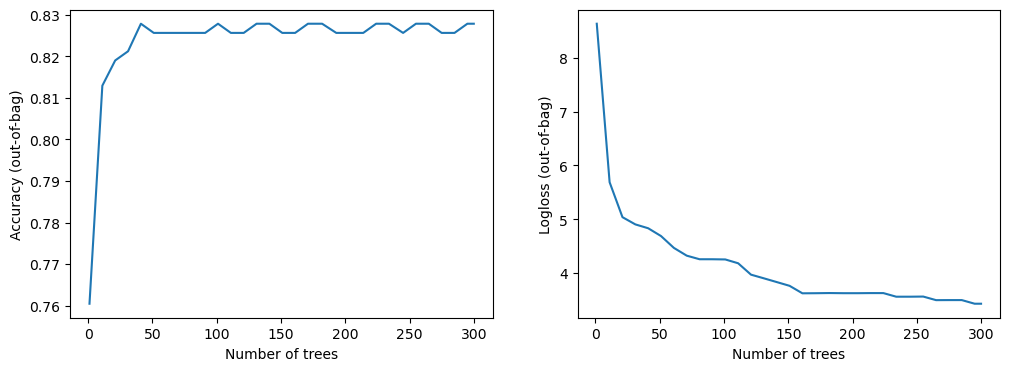

In [103]:
logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# Z Score Normalization
 on `berat` and `tinggi` columns

In [104]:
from scipy import stats

In [105]:
df_IMT2 = df_IMT.copy()
df_IMT2

,j_kel,usia_ukur(bulan),berat,tinggi,IMT/U
0,0,58,13.1,97.5,0
1,1,57,12.2,98.5,0
2,1,56,12.6,95.5,0
3,0,55,14.2,99.3,0
4,1,53,13.2,97.0,0
...,...,...,...,...,...
619,1,9,7.0,67.5,0
620,0,9,7.6,67.5,0
621,1,7,6.5,65.0,1
622,1,7,6.1,65.5,0


In [106]:
df_IMT2['berat'] = stats.zscore(df[df.columns[2]], axis=None)
df_IMT2['tinggi'] = stats.zscore(df[df.columns[3]], axis=None)
df_IMT2

,j_kel,usia_ukur(bulan),berat,tinggi,IMT/U
0,0,58,0.849982,1.134975,0
1,1,57,0.527666,1.218463,0
2,1,56,0.670918,0.967998,0
3,0,55,1.243924,1.285254,0
4,1,53,0.885795,1.093231,0
...,...,...,...,...,...
619,1,9,-1.334604,-1.369679,0
620,0,9,-1.119727,-1.369679,0
621,1,7,-1.513668,-1.578400,1
622,1,7,-1.656920,-1.536656,0


In [107]:
X2 = df_IMT2[df_IMT2.columns[:4]]
y2 = df_IMT2[df_IMT2.columns[-1]]
X2, y2 = np.array(X), np.array(y)
# Membagi data menjadi data latih dan data uji
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Naive Bayes

In [108]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_model2 = GaussianNB()
naive_bayes_model2.fit(X2_train, y2_train)

# Melakukan prediksi pada data uji
naive_bayes_predictions2 = naive_bayes_model.predict(X2_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y2_test, naive_bayes_predictions2)
print("Akurasi Naive Bayes:", naive_bayes_accuracy)

Akurasi Naive Bayes: 0.704


## Decision Tree

In [109]:
# Inisialisasi model Decision Tree Classifier
dct_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dct_model.fit(X2_train, y2_train)

# Melakukan prediksi pada data uji
dct_predictions2 = dct_model.predict(X2_test)

# Mengukur akurasi model
accuracy = accuracy_score(y2_test, dct_predictions2)
print("Accuracy Decision Tree:", accuracy)

Accuracy Decision Tree: 0.704


## Random Forest SK Learn

In [110]:
# creating a RF classifier 
rf_model2 = RandomForestClassifier(n_estimators = 300)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
rf_model.fit(X2_train, y2_train) 
  
# performing predictions on the test dataset 
rf_predictions2 = rf_model.predict(X2_test) 
    
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y2_test, rf_predictions2))

ACCURACY OF THE MODEL:  0.792


## KNN